<a href="https://colab.research.google.com/github/Fabian-lewis/PLP-AI-Model-WK3/blob/main/Deep_Learning_With_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning on MNIST — CNN Model

#### Objective
Build a Convolutional Neural Network (CNN) to classify handwritten digits (0–9) from the MNIST dataset, and achieve >95% accuracy.

### Tools
    Pytorch : it’s intuitive, closer to Python, and gives you more control over what’s happening under the hood.
    

In [ ]:
## Step 1: Imprort the Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
#print(torchvision.__version__)

#### Key
    torchvision helps us access and work with standard datasets like MNIST.

    transforms is used to normalize image data (very important for neural networks).
    
    matplotlib is for plotting sample predictions later.

In [ ]:
## Load and Normalize the Dataset

# Define transformation: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(), # * Convert PIL image to PyTorch
    transforms.Normalize((0.5,),(0.5,)) # Normalize to range [-1, 1]
])

# Download and load training data
trainset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download  and load the test data
testset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


dataiter = iter(trainloader)
images, labels = next(dataiter)

print("Batch loaded successfully. Shape:", images.shape)


100%|██████████| 9.91M/9.91M [00:00<00:00, 39.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.76MB/s]

Batch loaded successfully. Shape: torch.Size([64, 1, 28, 28])


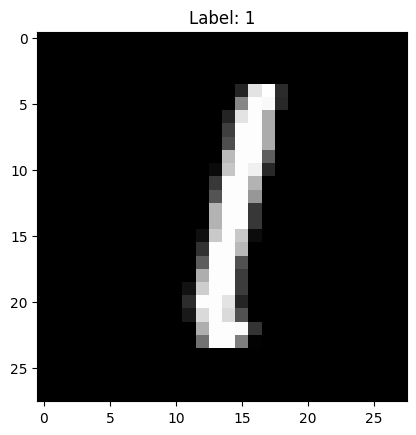

In [ ]:
# Visualize one sample from the training set
examples = iter(trainloader)
images, labels = next(examples)

plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()


### Key Explanations
🔍 What’s Happening:

     transforms.Compose(...): Applies a sequence of data transformations.

    ToTensor(): Converts the 28x28 image into a 1x28x28 tensor.

    Normalize((0.5,), (0.5,)): Maps pixel values from [0,1] → [−1,1].

    DataLoader: Groups images into batches (64 per batch), so we train efficiently.

In [ ]:
## Building The CNN Model (Convoutional Neural Network)

#custom CNN Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Convolutional Layer 1: Input channels = 1 (grayscale), output = 32 filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3,padding=1)

        # Convoutional Layer 2
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)

        # Pooling Layer: Halves the image dimension (2X2 window)
        self.pool = nn.MaxPool2d(2,2)

        # Fully Connected Layer 1: input = 64 feature maps of 7X7 each
        self.fc1 = nn.Linear(32*7*7, 128)

        # Output Layer: 10 digits (0-9)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        #Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv1(x)))

        #Conv2 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))

        # print("Shape before flattening:", x.shape)

        #Flatten image for fully connected layers
        # x = x.view(-1,64*7*7)
        x = x.view(x.size(0), -1)  # Correct and dynamic!

        # Dense Layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

## Instantiate the Model
net = Net()
# print(net)


### Breakdown of the Architecture

| Layer                      | Purpose                                           |
| -------------------------- | ------------------------------------------------- |
| `Conv2d`                   | Learns features (e.g., edges, curves)             |
| `ReLU`                     | Adds non-linearity (helps learn complex patterns) |
| `MaxPool2d`                | Downsamples image (reduces size and computation)  |
| `Linear` (Fully Connected) | Maps features to final digit predictions          |



#### CNN Architecture Summary
| Layer   | Shape Transformation | Description                                   |
| ------- | -------------------- | --------------------------------------------- |
| `conv1` | 1×28×28 → 32×28×28   | Detects low-level features (edges, lines)     |
| `pool`  | 32×28×28 → 32×14×14  | Reduces dimensionality, keeps key info        |
| `conv2` | 32×14×14 → 64×14×14  | Learns more complex features                  |
| `pool`  | 64×14×14 → 64×7×7    | Further downsamples                           |
| `fc1`   | 64×7×7 → 128         | Fully connected layer for decision-making     |
| `fc2`   | 128 → 10             | Output layer (10 scores for 10 digit classes) |


In [ ]:
# Define Loss Function & Optimizer


# Define how the model measures error
criterion = nn.CrossEntropyLoss()

# 🧰 Define how the model updates its weights
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Train the CNN model
epochs = 5  # You can experiment with higher values later

for epoch in range(epochs):
    running_loss = 0.0

    for images, labels in trainloader:
        # Reset gradients from previous iteration
        optimizer.zero_grad()

        # Forward pass
        outputs = net(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Track total loss
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss:.4f}")

## Instantiate the Model
# net = Net()
# print(net)


Epoch 1/5 - Loss: 163.6118
Epoch 2/5 - Loss: 45.7470
Epoch 3/5 - Loss: 32.5106
Epoch 4/5 - Loss: 23.8461
Epoch 5/5 - Loss: 18.7116


In [ ]:
correct = 0
total = 0

with torch.no_grad():  # Disable gradient tracking during evaluation
    for images, labels in testloader:
        outputs = net(images)  # Forward pass
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 98.95%


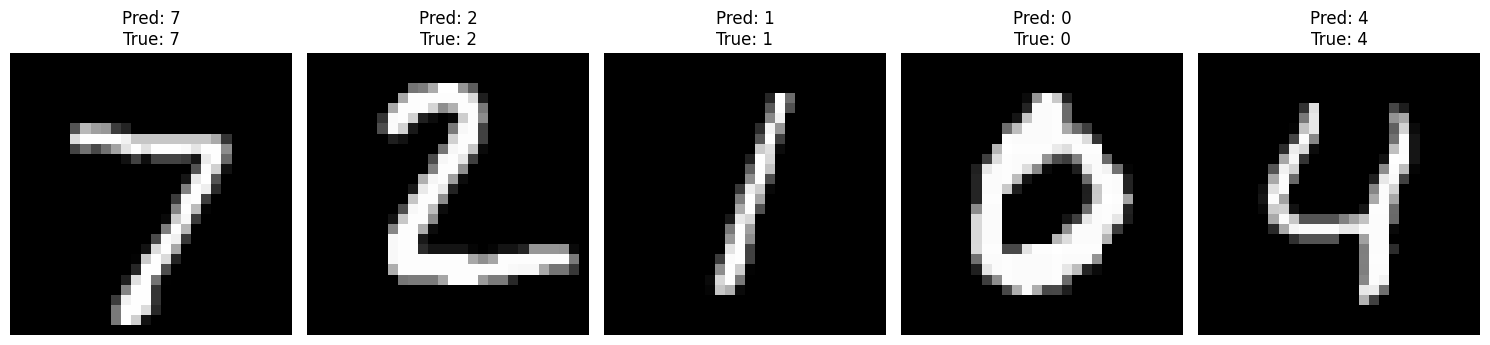

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get 5 random images from the test set
dataiter = iter(testloader)
images, labels = next(dataiter)

# Get model predictions
outputs = net(images)
_, preds = torch.max(outputs, 1)

# Plot the first 5 test images, their predicted labels, and true labels
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for idx in range(5):
    img = images[idx].squeeze()  # Remove extra channel
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(f"Pred: {preds[idx].item()}\nTrue: {labels[idx].item()}")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()
